### Carga de datos


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

 
# Cargar el CSV
df = pd.read_csv('./dataset_rttov_rad.csv')
 
# Ignorar la columna DateTimes
df = df.drop(columns=['DateTimes'])
 


In [2]:
df.head()

,P,T,Q,Angles,SurfType,SurfGeom,Skin,s2m,CO2,Result
0,"[0.010001825094223022, 0.025513030290603637, 0...","[188.55799865722656, 200.30657958984375, 209.5...","[2.5727205184011837e-06, 3.108421992692456e-06...","[69.48999786376953, 135.25999450683594, 69.489...","[1, 0]","[89.76709773229231, 127.39059678184276, 0.213]","[266.60260009765625, 35.0, 0.0, 0.0, 3.0, 5.0,...","[1015.296875, 266.52154541015625, 0.0019336412...","[374.361, 374.362, 374.365, 374.369, 374.375, ...","[0.0106276168930107, 0.03501497909868523, 0.06..."
1,"[0.010001825094223022, 0.025513030290603637, 0...","[188.55799865722656, 200.30657958984375, 209.5...","[2.5727205184011837e-06, 3.108421992692456e-06...","[69.6199951171875, 176.50999450683594, 69.6199...","[0, 0]","[89.8342977305947, 168.690595738517, 0.0]","[266.60260009765625, 35.0, 0.0, 0.0, 3.0, 5.0,...","[1015.296875, 266.52154541015625, 0.0019336412...","[374.361, 374.362, 374.365, 374.369, 374.375, ...","[0.014220206612348598, 0.044072807862686775, 0..."
2,"[0.010001825094223022, 0.025513030290603637, 0...","[188.71034240722656, 199.54681396484375, 209.2...","[2.57106160006515e-06, 3.1260007062883233e-06,...","[70.01000213623047, 13.989999771118164, 70.010...","[0, 0]","[89.31309774376132, 6.1239998452947475, 0.0]","[266.69635009765625, 35.0, 0.0, 0.0, 3.0, 5.0,...","[1015.296875, 266.55279541015625, 0.0019383751...","[374.361, 374.362, 374.365, 374.369, 374.375, ...","[0.01414123091522485, 0.04380257689505144, 0.0..."
3,"[0.010001825094223022, 0.025513030290603637, 0...","[188.73377990722656, 199.65228271484375, 209.2...","[2.568616878306784e-06, 3.1279215590984677e-06...","[69.88999938964844, 25.649999618530273, 69.889...","[0, 0]","[89.26079774508253, 17.736499551938323, 0.0]","[266.69635009765625, 35.0, 0.0, 0.0, 3.0, 5.0,...","[1014.976875, 266.52154541015625, 0.0019580324...","[374.361, 374.362, 374.365, 374.369, 374.375, ...","[0.014167125655083272, 0.0438911892227122, 0.0..."
4,"[0.010001825094223022, 0.025513030290603637, 0...","[188.75428771972656, 199.74310302734375, 209.2...","[2.5669288561402936e-06, 3.128852881673083e-06...","[69.73999786376953, 34.93000030517578, 69.7399...","[0, 0]","[89.71179773368931, 27.060399316396797, 0.0]","[266.79010009765625, 35.0, 0.0, 0.0, 3.0, 5.0,...","[1014.816875, 266.58404541015625, 0.0019920786...","[374.361, 374.362, 374.365, 374.369, 374.375, ...","[0.014204180368232367, 0.044016515967139874, 0..."


In [3]:
## Instancias tiene el dataset:
num_reg = len(df)
print("Número de registros en el dataset:", num_reg)


Número de registros en el dataset: 40000


In [4]:
##################################################
 
# Convertir la columna en una lista de arrays
P_values = np.array([np.array(eval(row)) for row in df['P']])
T_values = np.array([np.array(eval(row)) for row in df['T']])
Q_values = np.array([np.array(eval(row)) for row in df['Q']])
CO2_values = np.array([np.array(eval(row)) for row in df['CO2']])

Angles = np.array([np.array(eval(row)) for row in df['Angles']])
SurfGeom = np.array([np.array(eval(row)) for row in df['SurfGeom']])
Skin = np.array([np.array(eval(row)) for row in df['Skin']])
s2m = np.array([np.array(eval(row)) for row in df['s2m']])
SurfType = np.array([np.array(eval(row)) for row in df['SurfType']])


# Calcular media para P, T, Q (y CO2)
P_mean = np.mean(P_values, axis=1)
T_mean = np.mean(T_values, axis=1)
Q_mean = np.mean(Q_values, axis=1)
CO2_mean = np.mean(CO2_values, axis=1)


# Crear un DataFrame con las nuevas variables
SurfGeom_df = pd.DataFrame(SurfGeom, columns=[f"SurfGeom_{i}" for i in range(SurfGeom.shape[1])])
Angles_df = pd.DataFrame(Angles, columns=[f"Angles_{i}" for i in range(Angles.shape[1])])
Skin_df = pd.DataFrame(Skin, columns=[f"Skin_{i}" for i in range(Skin.shape[1])])
s2m_df = pd.DataFrame(s2m, columns=[f"s2m_{i}" for i in range(s2m.shape[1])])
SurfType_df = pd.DataFrame(SurfType, columns=[f"SurfType_{i}" for i in range(SurfType.shape[1])])

# Se hace lo mismo para resultado objetivo
Results = np.array([np.array(eval(row)) for row in df['Result']])
results_df = pd.DataFrame(Results, columns=[f"Result_{i}" for i in range(Results.shape[1])])

# Crear un DataFrame con las medias y desviaciones estándar
stats_df = pd.DataFrame({
    "P": P_mean, 
    "T": T_mean, 
    "Q": Q_mean,
    "CO2": CO2_mean
})

# Concatenar todos los DataFrame en uno solo
final_df = pd.concat([stats_df, SurfGeom_df, Angles_df, Skin_df, s2m_df, SurfType_df, results_df], axis=1)



In [5]:
# Mostrar el DataFrame resultante
final_df.head()

,P,T,Q,CO2,SurfGeom_0,SurfGeom_1,SurfGeom_2,Angles_0,Angles_1,Angles_2,...,s2m_3,s2m_4,s2m_5,SurfType_0,SurfType_1,Result_0,Result_1,Result_2,Result_3,Result_4
0,17.854447,240.493736,0.000004,376.506556,89.767098,127.390597,0.213,69.489998,135.259995,69.489998,...,0.0,0.0,0.0,1,0,0.010628,0.035015,0.067416,0.064593,0.052558
1,17.854447,240.493736,0.000004,376.506556,89.834298,168.690596,0.000,69.619995,176.509995,69.619995,...,0.0,0.0,0.0,0,0,0.014220,0.044073,0.067467,0.064560,0.065187
2,17.854447,240.492144,0.000004,376.506556,89.313098,6.124000,0.000,70.010002,13.990000,70.010002,...,0.0,0.0,0.0,0,0,0.014141,0.043803,0.067345,0.064319,0.064785
3,17.854447,240.496430,0.000004,376.506556,89.260798,17.736500,0.000,69.889999,25.650000,69.889999,...,0.0,0.0,0.0,0,0,0.014167,0.043891,0.067400,0.064401,0.064917
4,17.854447,240.499866,0.000004,376.506556,89.711798,27.060399,0.000,69.739998,34.930000,69.739998,...,0.0,0.0,0.0,0,0,0.014204,0.044017,0.067488,0.064526,0.065104


In [6]:
# Vamos a explorar Skin y S2m para simplificar las columnas que no aporten información útil a la red
Skin_df.head()
# Se puede observar que la única columna de Skin cuyos datos varían es Skin_0. 
# El resto de columnas son útiles como inputs para RTTOV, pero no para una red neuronal.

,Skin_0,Skin_1,Skin_2,Skin_3,Skin_4,Skin_5,Skin_6,Skin_7,Skin_8
0,266.60260,35.0,0.0,0.0,3.0,5.0,15.0,0.1,0.3
1,266.60260,35.0,0.0,0.0,3.0,5.0,15.0,0.1,0.3
2,266.69635,35.0,0.0,0.0,3.0,5.0,15.0,0.1,0.3
3,266.69635,35.0,0.0,0.0,3.0,5.0,15.0,0.1,0.3
4,266.79010,35.0,0.0,0.0,3.0,5.0,15.0,0.1,0.3


In [7]:
s2m_df.head()
# En el caso de s2m, solo aporan información las columnas _0, _1 y _2. Se puede prescindir del resto.

,s2m_0,s2m_1,s2m_2,s2m_3,s2m_4,s2m_5
0,1015.296875,266.521545,0.001934,0.0,0.0,0.0
1,1015.296875,266.521545,0.001934,0.0,0.0,0.0
2,1015.296875,266.552795,0.001938,0.0,0.0,0.0
3,1014.976875,266.521545,0.001958,0.0,0.0,0.0
4,1014.816875,266.584045,0.001992,0.0,0.0,0.0


In [8]:
# Se eliminarán esas columnas de la Skin_1 a la Skin_8
# Y de s2m_3 a s2m_4
final_df = final_df.drop(columns=['Skin_1', 'Skin_2', 'Skin_3', 'Skin_4', 'Skin_5', 'Skin_6', 'Skin_7', 'Skin_8', 
                                  's2m_3', 's2m_4', 's2m_5'])
 

In [9]:
# Mostrar el DataFrame depurado
final_df.head()

,P,T,Q,CO2,SurfGeom_0,SurfGeom_1,SurfGeom_2,Angles_0,Angles_1,Angles_2,...,s2m_0,s2m_1,s2m_2,SurfType_0,SurfType_1,Result_0,Result_1,Result_2,Result_3,Result_4
0,17.854447,240.493736,0.000004,376.506556,89.767098,127.390597,0.213,69.489998,135.259995,69.489998,...,1015.296875,266.521545,0.001934,1,0,0.010628,0.035015,0.067416,0.064593,0.052558
1,17.854447,240.493736,0.000004,376.506556,89.834298,168.690596,0.000,69.619995,176.509995,69.619995,...,1015.296875,266.521545,0.001934,0,0,0.014220,0.044073,0.067467,0.064560,0.065187
2,17.854447,240.492144,0.000004,376.506556,89.313098,6.124000,0.000,70.010002,13.990000,70.010002,...,1015.296875,266.552795,0.001938,0,0,0.014141,0.043803,0.067345,0.064319,0.064785
3,17.854447,240.496430,0.000004,376.506556,89.260798,17.736500,0.000,69.889999,25.650000,69.889999,...,1014.976875,266.521545,0.001958,0,0,0.014167,0.043891,0.067400,0.064401,0.064917
4,17.854447,240.499866,0.000004,376.506556,89.711798,27.060399,0.000,69.739998,34.930000,69.739998,...,1014.816875,266.584045,0.001992,0,0,0.014204,0.044017,0.067488,0.064526,0.065104


In [10]:
total_nulos = final_df.isnull().sum().sum()
print("Valores nulos en todo el dataset:", total_nulos)

Valores nulos en todo el dataset: 0


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P           40000 non-null  float64
 1   T           40000 non-null  float64
 2   Q           40000 non-null  float64
 3   CO2         40000 non-null  float64
 4   SurfGeom_0  40000 non-null  float64
 5   SurfGeom_1  40000 non-null  float64
 6   SurfGeom_2  40000 non-null  float64
 7   Angles_0    40000 non-null  float64
 8   Angles_1    40000 non-null  float64
 9   Angles_2    40000 non-null  float64
 10  Angles_3    40000 non-null  float64
 11  Skin_0      40000 non-null  float64
 12  s2m_0       40000 non-null  float64
 13  s2m_1       40000 non-null  float64
 14  s2m_2       40000 non-null  float64
 15  SurfType_0  40000 non-null  int32  
 16  SurfType_1  40000 non-null  int32  
 17  Result_0    40000 non-null  float64
 18  Result_1    40000 non-null  float64
 19  Result_2    40000 non-nul

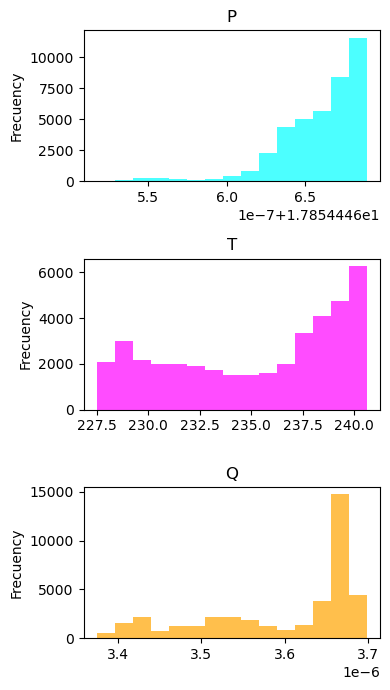

,P,T,Q,CO2,SurfGeom_0,SurfGeom_1,SurfGeom_2,Angles_0,Angles_1,Angles_2,...,s2m_0,s2m_1,s2m_2,SurfType_0,SurfType_1,Result_0,Result_1,Result_2,Result_3,Result_4
count,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.785445e+01,235.240272,3.599816e-06,3.765066e+02,55.505125,116.708561,0.656057,43.599669,24.235338,43.599669,...,941.172415,282.749162,0.005228,1.622275,0.0,0.018526,0.057546,0.079101,0.078650,0.084436
std,2.720226e-08,4.172282,9.030800e-08,1.409734e-10,17.778192,18.012791,0.773366,11.074920,85.378645,11.074920,...,76.906925,11.642302,0.003927,0.770950,0.0,0.002607,0.007930,0.008702,0.009946,0.011482
min,1.785445e+01,227.526017,3.375567e-06,3.765066e+02,22.750499,0.548700,0.000000,22.080000,-179.989990,22.080000,...,539.136875,260.302795,0.001413,0.000000,0.0,0.010628,0.035015,0.046532,0.043070,0.051935
25%,1.785445e+01,231.330885,3.528887e-06,3.765066e+02,40.164274,106.191672,0.061000,34.660000,-66.222500,34.660000,...,900.256875,271.146545,0.002448,2.000000,0.0,0.018014,0.056066,0.076522,0.076253,0.082243
50%,1.785445e+01,236.455487,3.651160e-06,3.765066e+02,57.082999,113.621147,0.457000,41.969997,7.030000,41.969997,...,961.216875,281.052795,0.003314,2.000000,0.0,0.019558,0.060615,0.082156,0.082382,0.088830
75%,1.785445e+01,239.105914,3.670074e-06,3.765066e+02,70.794623,123.232722,1.006000,52.222498,102.669998,52.222498,...,999.776875,294.771545,0.006844,2.000000,0.0,0.020327,0.063069,0.085494,0.085760,0.092447
max,1.785445e+01,240.589801,3.697837e-06,3.765066e+02,89.834298,179.987895,6.096000,70.299995,179.989990,70.299995,...,1026.336875,304.334045,0.020226,2.000000,0.0,0.021630,0.067536,0.091502,0.092052,0.099183


In [12]:
## Distribución de las variables P, T y Q

fig, axs = plt.subplots(3, 1, figsize=(4, 7))

axs[0].hist(final_df['P'], bins=15, color='cyan', alpha=0.7)
axs[0].set_title('P')
axs[0].set_ylabel('Frecuency')

axs[1].hist(final_df['T'], bins=15, color='magenta', alpha=0.7)
axs[1].set_title('T')
axs[1].set_ylabel('Frecuency')

axs[2].hist(final_df['Q'], bins=15, color='orange', alpha=0.7)
axs[2].set_title('Q')
axs[2].set_ylabel('Frecuency')

plt.tight_layout()
plt.show()
final_df.describe()

In [13]:
# También se eliminará SurfType_1, dado que su valor siempre es cero
# Y CO2, al ser una constante
 
final_df = final_df.drop(columns=['SurfType_1', 'CO2'])

[Text(0.5, 0, 'P'),
 Text(1.5, 0, 'T'),
 Text(2.5, 0, 'Q'),
 Text(3.5, 0, 'SurfGeom_0'),
 Text(4.5, 0, 'SurfGeom_1'),
 Text(5.5, 0, 'SurfGeom_2'),
 Text(6.5, 0, 'Angles_0'),
 Text(7.5, 0, 'Angles_1'),
 Text(8.5, 0, 'Angles_2'),
 Text(9.5, 0, 'Angles_3'),
 Text(10.5, 0, 'Skin_0'),
 Text(11.5, 0, 's2m_0'),
 Text(12.5, 0, 's2m_1'),
 Text(13.5, 0, 's2m_2'),
 Text(14.5, 0, 'SurfType_0'),
 Text(15.5, 0, 'Result_0'),
 Text(16.5, 0, 'Result_1'),
 Text(17.5, 0, 'Result_2'),
 Text(18.5, 0, 'Result_3'),
 Text(19.5, 0, 'Result_4')]

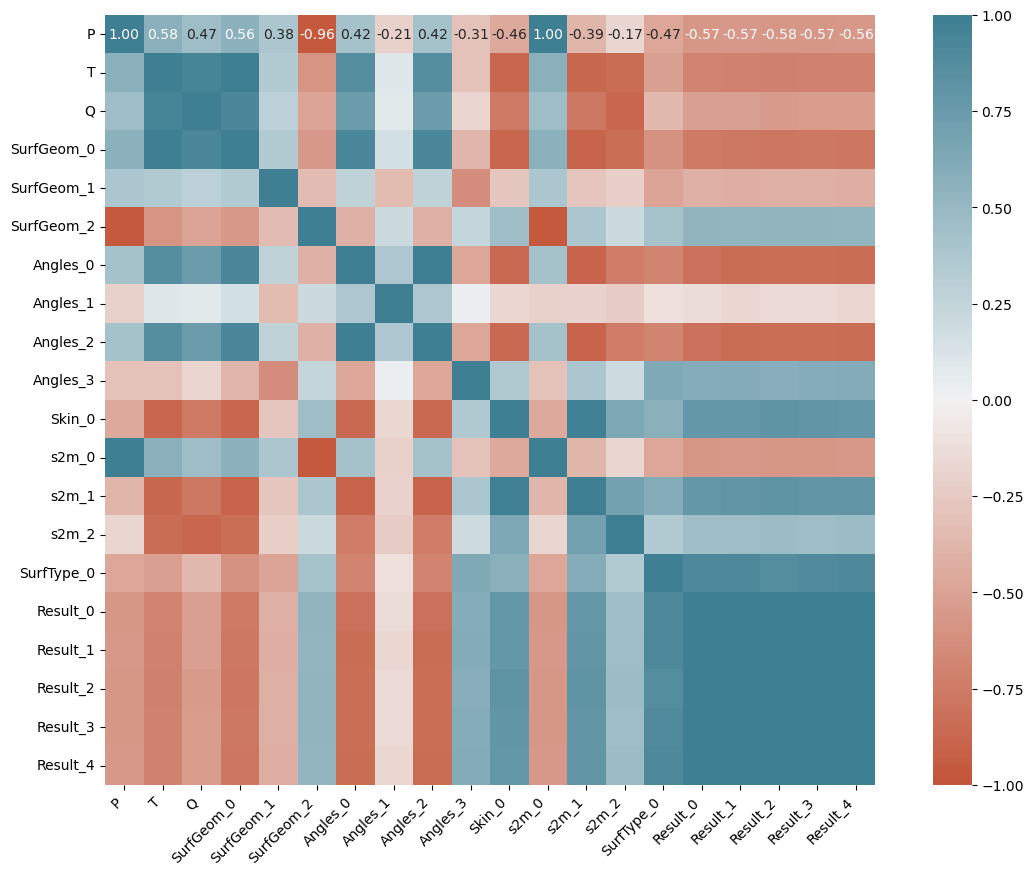

In [14]:
## ¿cómo son las correlaciones entre las variables del dataset?

# Con correlación de Pearson:
corr = final_df.corr(method ='pearson') # para ver si existe relación lineal entre variables [1, -1]

# HeatMap
plt.figure(figsize=(15,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [15]:
# Se puede observar que la elevación (SurfGeom_2) está inversamente relacionada con la presión (P) y con s2m_0:
# Se puede prescindir de una de las variables para evitar redundancia. Se eliminarán SurfGeom_2 y s2m_0:
final_df = final_df.drop(columns=['SurfGeom_2','s2m_0'])

# También llama la atención que Angles_1 (ángulo acimutal) tiene una correlación muy baja con las variables objetivo Result_*
# Se puede prescindir de ella:
final_df = final_df.drop(columns=['Angles_1'])


In [16]:
pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import time
# Normalizar datos
scaler = StandardScaler()
scaler.fit(final_df)
rttovTransformado = pd.DataFrame(scaler.transform(final_df), columns=final_df.columns)

# Dividir para regresión multivariable
X = rttovTransformado.drop(columns=['Result_0','Result_1','Result_2','Result_3','Result_4']).copy()
Y = rttovTransformado[['Result_0','Result_1','Result_2','Result_3','Result_4']]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 

In [18]:

# Definir la función para construir el modelo
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(
        units=hp.Int('units_0', min_value=32, max_value=512, step=32),
        activation='relu', input_shape=(X_train.shape[1],)
    ))
   
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model.add(layers.Dropout(0.02)) #model.add(layers.BatchNormalization()) # 
   
    model.add(layers.Dense(Y_train.shape[1], activation='linear'))  # Salida continua
   
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='mse',
        metrics=['mae']
    )
   
    return model

# Configurar KerasTuner
tuner = kt.Hyperband(
    build_model,
    objective='val_mae',
    max_epochs=20,
    factor=3,
    directory='kt_search',
    project_name='rttov_tuning'
)

# Definir el callback para detener temprano
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

# Iniciar la búsqueda de hiperparámetros
ini = time.time()
tuner.search(X_train, Y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]
fin = time.time()

print("Mejores hiperparámetros:")
print(f"Número de capas ocultas: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Unidades en capa {i+1}: {best_hps.get(f'units_{i}')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Entrenar el mejor modelo
best_model = tuner.hypermodel.build(best_hps)

ini_fit = time.time()
history = best_model.fit(X_train, Y_train, epochs=200, batch_size=64, 
                         validation_data=(X_test, Y_test), callbacks=[stop_early])
fin_fit = time.time()
# Evaluar en el conjunto de prueba
test_loss, test_mae = best_model.evaluate(X_test, Y_test)
print(f"Pérdida en test: {test_loss}, MAE en test: {test_mae}")

print(f"Total parameter search time: {fin - ini:.4f} seconds")
print(f"Total training time: {fin_fit - ini_fit:.4f} seconds")

Trial 30 Complete [00h 00m 11s]
val_mae: 0.09387993067502975

Best val_mae So Far: 0.0813119187951088
Total elapsed time: 00h 03m 19s
Mejores hiperparámetros:
Número de capas ocultas: 3
Unidades en capa 1: 384
Unidades en capa 2: 224
Unidades en capa 3: 288
Learning Rate: 0.00022910740420359905
Epoch 1/200


c:\Users\Bruno\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1596 - mae: 0.2297 - val_loss: 0.0395 - val_mae: 0.1206
Epoch 2/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0357 - mae: 0.1167 - val_loss: 0.0338 - val_mae: 0.0993
Epoch 3/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0339 - mae: 0.1095 - val_loss: 0.0344 - val_mae: 0.1037
Epoch 4/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0320 - mae: 0.1075 - val_loss: 0.0321 - val_mae: 0.0944
Epoch 5/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0306 - mae: 0.1017 - val_loss: 0.0308 - val_mae: 0.0971
Epoch 6/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0283 - mae: 0.0987 - val_loss: 0.0311 - val_mae: 0.0959
Epoch 7/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0280 - mae: 0.0970 - val_loss: 0.0300 - val_mae: 0.0896
Epoch 8/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0278 - mae: 0.0965 - val_loss: 0.0300 - val_mae: 0.0910
Epoch 9/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss:

In [19]:
# Evaluación
#test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0248, Test MAE: 0.0727


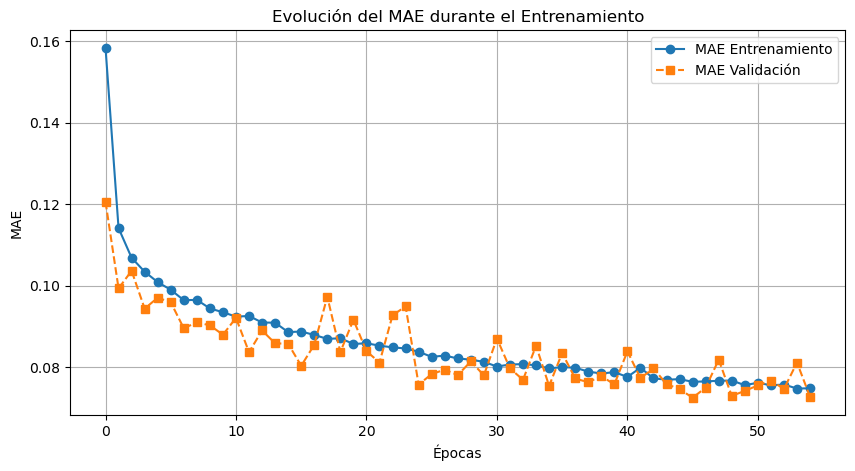

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'][:1000], label='MAE Entrenamiento', marker='o')
plt.plot(history.history['val_mae'][:1000], label='MAE Validación', marker='s', linestyle='dashed')

# Configuración del gráfico
plt.title("Evolución del MAE durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

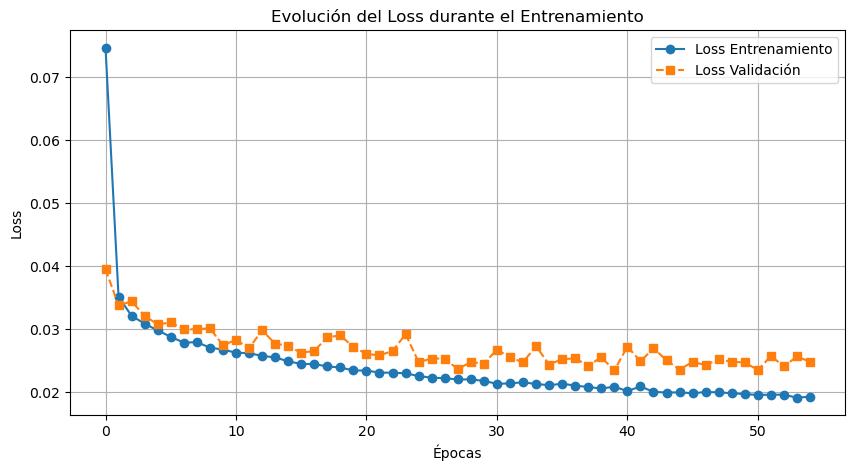

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'][:1000], label='Loss Entrenamiento', marker='o')
plt.plot(history.history['val_loss'][:1000], label='Loss Validación', marker='s', linestyle='dashed')

# Configuración del gráfico
plt.title("Evolución del Loss durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [22]:
import time

ini = time.time()
best_model.predict(X_test)
fin = time.time()
print(f"Total execution time: {fin - ini:.4f} seconds")
print(len(X_test))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
Total execution time: 0.2401 seconds
8000
